## Scattering layer

So I need some object to replace the `torch.nn`, where instead of a convolutional layer, we take a scattering transform. Ultimately this object can then be swapped into the default CAMELs analysis once it is operating. Here we construct it though.

In [28]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/chris/Projects/Wavelets/models')

from models_factory import baseModelFactory, topModelFactory
from sn_hybrid_models import sn_HybridModel

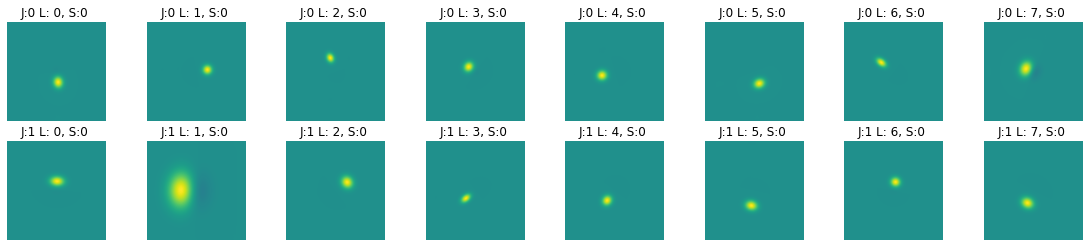

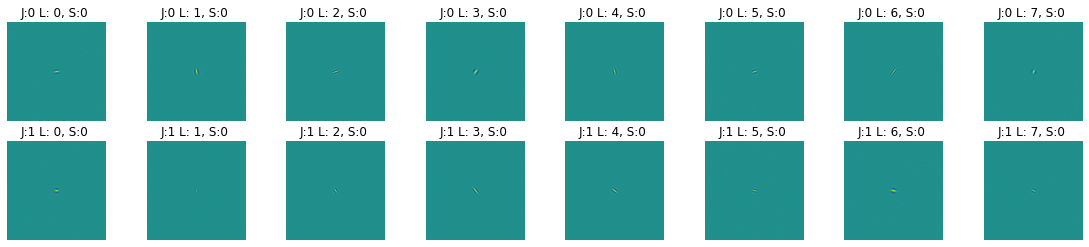

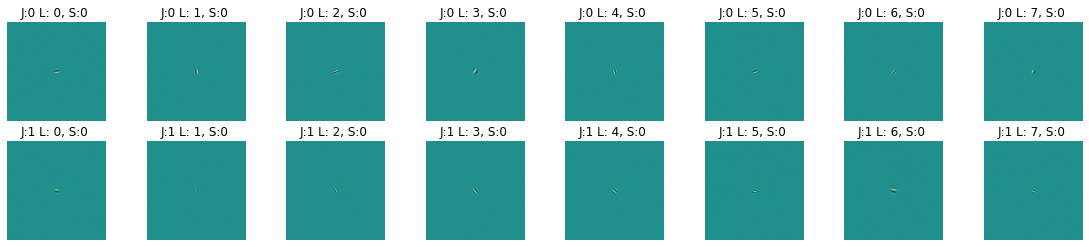

In [20]:
## Can I just create one of these? Do I need the top model too, or hybrid model?
scatteringBase = baseModelFactory( #creat scattering base model
    architecture='scattering',
    J=2,
    N=256,
    M=256,
    second_order=True,
    initialization="Random",
    seed=123,
    learnable=False,
    lr_orientation=0.1,
    lr_scattering=0.1,
    filter_video=False,
    device="cpu",
    use_cuda=False
)

In [21]:
scatteringBase.n_coefficients

64

In [22]:
scatteringBase.params_filters

[tensor([0.1424, 1.7513, 3.5119, 4.1038, 4.9957, 0.3736, 4.0704, 4.3338, 3.0945,
         4.6732, 2.2070, 5.3746, 5.6272, 6.0662, 2.9312, 5.8151]),
 tensor([0.6721, 0.6939, 0.9419, 0.5425, 0.8357, 0.8025, 0.9791, 0.5084, 0.6034,
         0.9699, 0.9070, 0.7829, 0.7821, 0.9653, 0.5661, 0.8705]),
 tensor([3.9515, 4.8859, 4.9071, 4.9035, 4.4009, 4.7830, 4.0919, 3.6169, 4.7002,
         1.8238, 4.0407, 4.2862, 4.4105, 4.7032, 4.8454, 4.2476]),
 tensor([0.8411, 1.0079, 0.7888, 1.1192, 0.9532, 1.1943, 0.6503, 1.2029, 1.4633,
         1.3939, 1.1078, 0.6462, 0.9002, 1.2512, 1.0512, 1.1844])]

In [ ]:
scatteringBase.forward

In [25]:
top = topModelFactory( #create cnn, mlp, linearlayer, or other
    base=scatteringBase,
    architecture="cnn",
    num_classes=6, 
    width=8, 
    use_cuda=False
)

    

In [30]:
hybridModel = sn_HybridModel(scatteringBase=scatteringBase, top=top, use_cuda=False) #creat hybrid model